In [1]:
from matplotlib import pyplot as plt


In [2]:
x = [1,2,3,4,5]

In [3]:
y = [2,3,5,7,11]

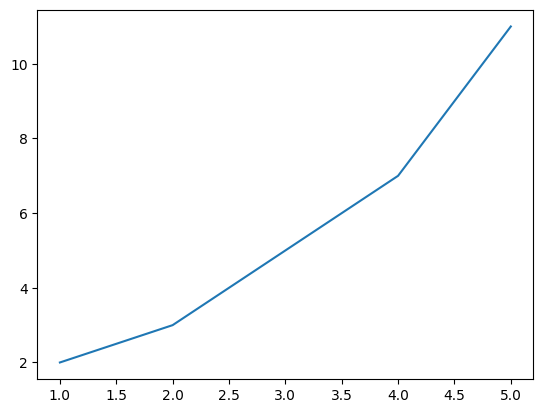

In [4]:
plt.plot(x, y, label="prime numbers")

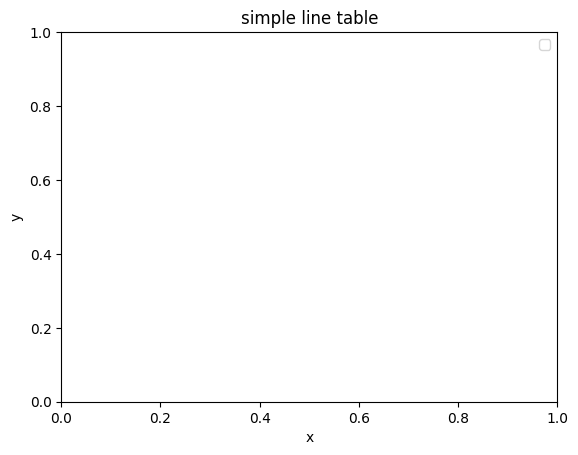

In [5]:
plt.title("simple line table")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [6]:
from google.colab import files

In [7]:
uploaded = files.upload()

Saving w1_petrol_consumption-220925-152435.csv to w1_petrol_consumption-220925-152435.csv
Saving w1_student_scores-220925-152435.csv to w1_student_scores-220925-152435.csv


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("w1_student_scores-220925-152435.csv")

In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


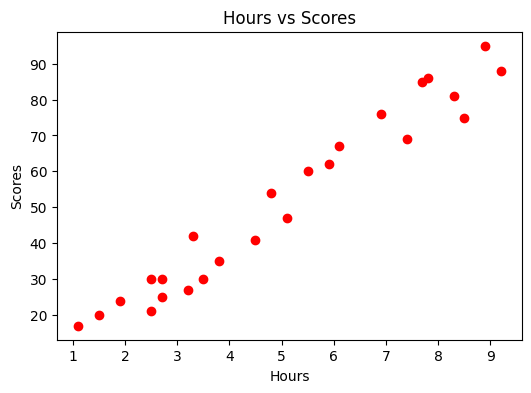

In [11]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'],df['Scores'], 'ro')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


In [12]:
import numpy as np

In [13]:
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

In [14]:
print(xmean)
print(ymean)

5.012
51.48


calculate the tearm needed for the numator and demoninator of beta.

In [15]:
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
df['xvar'] = (df['Hours'] - xmean)**2

In [16]:
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'slope: {slope}')
print(f'intercept: {intercept}')

slope: 9.775803390787473
intercept: 2.4836734053731817


In [17]:
intercept + slope*7

70.9142971408855

In [18]:
scores_predicted = intercept + slope*df['Hours']

#Multiple linear regression


In [19]:
df = pd.read_csv("w1_petrol_consumption-220925-152435.csv")

In [20]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [21]:
y = df['Petrol_Consumption']
x = df[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_tax']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor = LinearRegression()


In [26]:
regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
regressor.intercept_

361.45087906668397

In [28]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [31]:
print(result)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [32]:
regressor.score(x_test, y_test)

0.39136640014305457

In [33]:
regressor.score(x_train, y_train)

0.7068781342155135